# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Rizkillah Ramanda Sinyo
- Email: rizkillah.ramanda6144@student.unri.ac.id
- Id Dicoding: rizkillah6144

## Menentukan Pertanyaan Bisnis

* Berapa rata-rata, minimum, dan maksimum jumlah peminjaman sepeda per hari ? <br>
* Apakah kelembaban (hum) dan kecepatan angin (windspeed) mempengaruhi jumlah peminjaman ? <br>
* Bagaimana perbedaan jumlah penyewaan antara: Hari kerja vs hari libur? <br>
* Bagaimana perbedaan jumlah penyewaan antara: Musim panas vs musim dingin? <br>
* Pada jam berapa penyewaan sepeda paling tinggi ? <br>

## Import Library

In [226]:
# memanggil semua library yang dibutuhkan.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [227]:
# Load data day
day_df = pd.read_csv("./Bike-sharing-dataset/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [228]:
# Load data hour
hour_df = pd.read_csv("./Bike-sharing-dataset/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [229]:
# Info data day & hour
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

In [230]:
# cek missiong  value data day
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [231]:
# cek missiong  value data hour
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight: Tidak ada missing value dikedua dataset**

In [232]:
# Cek duplikasi
print("Jumlah duplikasi: ", day_df.duplicated().sum())
print("Jumlah duplikasi: ", hour_df.duplicated().sum())


Jumlah duplikasi:  0
Jumlah duplikasi:  0


**Insight: Tidak ada duplikasi dikedua dataset**

In [233]:
# Cek rentang data day
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [234]:
# Cek rentang data hour
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

### Tahapan Pembersihan dan Persiapan Data (*Data Preprocessing*)

Berikut adalah langkah-langkah yang akan dilakukan untuk menyiapkan dataset agar siap dianalisis:

**1. Pemilihan Fitur (*Feature Selection*)**
Kita akan menghapus kolom yang tidak relevan atau memiliki informasi berulang (redundan):
* **Menghapus kolom `workingday`**: Informasi pada kolom ini dinilai redundan karena status hari kerja atau hari libur sudah dapat diidentifikasi melalui analisis kolom `weekday`.

**2. Penyesuaian Tipe Data (*Type Casting*)**
* **Konversi ke `datetime`**: Mengubah kolom `dteday` dari tipe `object` (string) menjadi `datetime` untuk memudahkan manipulasi data runtun waktu (*time series*).
* **Konversi ke `category`**: Mengubah tipe data pada kolom `season`, `mnth`, `holiday`, `weekday`, dan `weathersit` menjadi tipe *categorical*.
    > *Catatan: Data kategorikal digunakan untuk variabel yang nilainya terbatas pada kelompok atau label tertentu, bukan angka kontinu.*

**3. Penataan dan Transformasi Data**
* **Perubahan Nama Kolom (*Renaming*)**: Mengganti nama-nama kolom agar lebih deskriptif dan mudah dibaca.
* **Pemetaan Nilai (*Value Mapping*)**: Mengonversi isi kolom (yang mungkin berupa angka kode) menjadi label yang mudah dipahami manusia (contoh: mengubah angka bulan menjadi nama bulan).

**4. Rekayasa Fitur (*Feature Engineering*)**
* **Membuat Kolom Baru (`category_days`)**: Menambahkan kolom baru untuk mengelompokkan hari menjadi dua kategori sederhana: **Weekend** (akhir pekan) atau **Weekday** (hari kerja).

#### Drop

In [235]:
# Drop kolom workingday 
day_df.drop(['workingday'], axis = 1, inplace= True)
hour_df.drop(['workingday'], axis = 1, inplace= True)


#### Mengubah Tipe Data

In [236]:
# Ubah kolom season, mnth, holiday, weekday, dan weathersit menjadi kategori
columns = ['season', 'mnth', 'holiday', 'weekday', 'weathersit']
 
for column in columns:
    day_df[column] =  day_df[column].astype("category")
    hour_df[column] =  hour_df[column].astype("category")


In [237]:
# Ubah kolom dteday menjadi datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])


#### Rename

In [238]:
# Ubah nama kolom data day
day_df.rename(columns={'yr':'year','mnth':'month','weekday':'one_of_week', 'weathersit':'weather_situation', 'windspeed':'wind_speed','cnt':'count_cr','hum':'humidity'},inplace=True)

In [239]:
# Ubah nama kolom data hour
hour_df.rename(columns={'yr':'year','hr':'hours','mnth':'month','weekday':'one_of_week', 'weathersit':'weather_situation','windspeed':'wind_speed','cnt':'count_cr','hum':'humidity'},inplace=True)

In [ ]:
# Membuat dictionary untuk memetakan kode angka menjadi label teks yang deskriptif
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
month_map = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
weather_map = {
    1: 'Clear', 2: 'Misty', 3: 'Light_rainsnow', 4: 'Heavy_rainsnow'
}
weekday_map = {
    0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 
    4: 'Thursday', 5: 'Friday', 6: 'Saturday'
}
year_map = {0: '2011', 1: '2012'}

# Mengubah nilai numerik pada dataset day menjadi label kategori
day_df['season'] = day_df['season'].map(season_map)
day_df['month'] = day_df['month'].map(month_map)
day_df['weather_situation'] = day_df['weather_situation'].map(weather_map)
day_df['one_of_week'] = day_df['one_of_week'].map(weekday_map)
day_df['year'] = day_df['year'].map(year_map)

# Menerapkan perubahan untuk dataset hour
hour_df['season'] = hour_df['season'].map(season_map)
hour_df['month'] = hour_df['month'].map(month_map)
hour_df['weather_situation'] = hour_df['weather_situation'].map(weather_map)
hour_df['one_of_week'] = hour_df['one_of_week'].map(weekday_map)
hour_df['year'] = hour_df['year'].map(year_map)

# Mengubah nilai humidity dari skala ternormalisasi (0-1) menjadi persentase (0-100)
day_df['humidity'] = day_df['humidity'] * 100
hour_df['humidity'] = hour_df['humidity'] * 100

#### Membuat kolom baru bernama category_days yang menunjukan isi kolom tersebut weekend atau weekday

In [ ]:
# Membuat kolom baru bernama category_days yang menunjukan isi kolom tersebut weekend atau weekday
one_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
def get_category_days(one_of_week):
    if one_of_week in ["Saturday", "Sunday"]:
        return "weekend"
    else: 
        return "weekdays"

hour_df["category_days"] = hour_df["one_of_week"].apply(get_category_days)
day_df["category_days"] = day_df["one_of_week"].apply(get_category_days)

In [242]:
def classify_humidity(humidity):
    if humidity < 45:
        return "Terlalu kering"
    elif humidity >= 45 and humidity < 65:
        return "Ideal"
    else:
        return "Terlalu Lembab"

hour_df["humidity_category"] = hour_df["humidity"].apply(classify_humidity)
day_df["humidity_category"] = day_df["humidity"].apply(classify_humidity)

## Exploratory Data Analysis (EDA)

### Explore Dataset Day


In [ ]:
# Describe dataset day
day_df.describe()

,instant,dteday,temp,atemp,humidity,wind_speed,casual,registered,count_cr
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,0.495385,0.474354,62.789406,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,0.337083,0.337842,52.000000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,0.498333,0.486733,62.666700,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,0.655417,0.608602,73.020850,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,0.861667,0.840896,97.250000,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,0.183051,0.162961,14.242910,0.077498,686.622488,1560.256377,1937.211452


### 📊 Rangkuman Insight Statistik Dataset (`day_df`)

Berdasarkan hasil eksekusi fungsi `describe()`, berikut adalah poin-poin utama yang ditemukan:

**1. Kualitas & Kelengkapan Data**
* **Data Bersih:** Seluruh kolom memiliki jumlah data (*count*) sebanyak **731 baris**, yang mengindikasikan tidak ada lagi *missing values* (NaN) setelah proses pembersihan.
* **Rentang Waktu:** Data mencakup periode penuh selama 2 tahun, dari **1 Januari 2011** hingga **31 Desember 2012**.

**2. Perilaku Penyewaan (*User Behavior*)**
* **Dominasi Member:** Rata-rata penyewaan oleh pengguna terdaftar (*registered*) mencapai **~3.656 unit/hari**, jauh lebih tinggi dibandingkan pengguna kasual (*casual*) yang hanya **~848 unit/hari**.
    > *Insight:* Basis pengguna utama layanan ini adalah pengguna tetap/berlangganan.
* **Volume Harian:** Rata-rata total penyewaan adalah **4.504 sepeda/hari**, dengan rekor tertinggi mencapai **8.714 sepeda** dalam satu hari.

**3. Kondisi Lingkungan & Cuaca**
* **Cuaca Dominan:** Berdasarkan statistik kolom kategori, kondisi cuaca yang paling sering muncul (*top*) adalah **"Clear"** (Cerah/Sedikit berawan) dengan frekuensi **463 hari**.
* **Suhu & Kelembapan:** Rata-rata suhu (*temp*) berada di angka **0.49** (skala normalisasi) dan kelembapan rata-rata di **62.79%**, menunjukkan kondisi lingkungan yang cenderung kondusif untuk bersepeda.

**4. Distribusi Waktu**
* **Musim:** Musim gugur (*Fall*) tercatat sebagai musim dengan frekuensi data terbanyak.
* **Kategori Hari:** Kategori **"weekdays"** (hari kerja) mendominasi jumlah data dibandingkan akhir pekan, dengan total **521 hari**.

In [246]:
# Jumlah penyewaan ditiap musim
day_df.groupby(by="season").count_cr.sum().sort_values(ascending=False).reset_index().head(10)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7372\350100656.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="season").count_cr.sum().sort_values(ascending=False).reset_index().head(10)


,season,count_cr
0,Fall,1061129
1,Summer,918589
2,Winter,841613
3,Spring,471348


### Insights

* **Tren Musim:** Puncak penyewaan terjadi di **Musim Gugur (Fall)** (>1 juta transaksi), sedangkan terendah di **Musim Semi (Spring)**.
* **Profil Pengguna:** Layanan didominasi oleh **Member Terdaftar** (rata-rata 3.656/hari) dibanding pengguna kasual.
* **Pola Waktu:** Penggunaan lebih tinggi di **Hari Kerja (Weekdays)**, mengindikasikan fungsi sebagai transportasi komuter.
* **Kualitas Data:** Data lengkap **731 hari** (2011-2012) tanpa *missing values*, dengan cuaca dominan **Cerah**.

In [247]:
# Jumlah penyewaan ditiap tahun
day_df.groupby(by="year").agg({
    "registered": ["sum"],
    "casual": ["sum"]
})

,registered,casual
,sum,sum
year,,
2011,995851,247252
2012,1676811,372765


### Insight Pertumbuhan Bisnis (Year-on-Year)

* **Pertumbuhan Pesat:** Terjadi lonjakan signifikan total penyewaan dari tahun 2011 ke 2012.
* **Dominasi Member:** Pengguna terdaftar (*registered*) jauh mendominasi jumlah penyewaan dibandingkan pengguna kasual di kedua tahun tersebut.
* **Kenaikan Member Drastis:** Jumlah pengguna terdaftar tumbuh hampir **2x lipat**, dari **~995 ribu** (2011) menjadi **~1,6 juta** (2012).

### Explore Dataset hour


In [243]:
# Describe dataset day
hour_df.describe()

,instant,dteday,hours,temp,atemp,humidity,wind_speed,casual,registered,count_cr
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,11.546752,0.496987,0.475775,62.722884,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,6.000000,0.340000,0.333300,48.000000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,12.000000,0.500000,0.484800,63.000000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,18.000000,0.660000,0.621200,78.000000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,23.000000,1.000000,1.000000,100.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,6.914405,0.192556,0.171850,19.292983,0.122340,49.305030,151.357286,181.387599


### Insight Statistik Dataset Jam (`hour_df`)

Berdasarkan tabel statistik deskriptif data per jam:

* **Volume Data Masif:** Terdapat **17.379 baris data** (jam) yang terekam, menunjukkan detail data yang jauh lebih tinggi dibandingkan dataset harian.
* **Aktivitas Per Jam:**
    * **Rata-rata:** Sekitar **~189 sepeda** disewa setiap jamnya.
    * **Rekor Tertinggi:** Mencapai **977 sepeda** dalam satu jam (hampir 1000 unit!).
* **Dominasi Member:** Rata-rata penyewaan oleh member (*registered*) adalah **~154 unit/jam**, jauh di atas pengguna kasual (**~36 unit/jam**).
* **Rentang Waktu:** Data mencakup aktivitas 24 jam penuh (0-23 jam) dengan distribusi data yang merata (mean jam di angka 11.5).

In [244]:
# Jumlah penyewaan ditiap jam
hour_df.groupby(by="hours").agg({
    "count_cr": ["sum"]
})

,count_cr
,sum
hours,
0,39130
1,24164
2,16352
3,8174
4,4428
5,14261
6,55132
7,154171


### Insight Aktivitas Per Jam (Hourly Activity)

Berdasarkan data distribusi jam dan statistik deskriptif:

* **Pola Komuter Sangat Kuat:** Puncak penyewaan terjadi pada jam sibuk pulang kerja (**17:00** dengan **336.860** sewa) dan berangkat kerja (**08:00** dengan **261.001** sewa). Ini mengonfirmasi bahwa sepeda digunakan sebagai alat transportasi utama pekerja/pelajar.
* **Waktu Paling Sepi:** Aktivitas penyewaan terendah terjadi pada pukul **04:00 pagi** (hanya 4.428 total sewa), yang merupakan waktu istirahat manusia.
* **Statistik Penggunaan:** Rata-rata terjadi **~189 penyewaan per jam**. Namun pada jam tersibuk, permintaan bisa melonjak drastis hingga **977 sepeda** dalam satu jam.
* **Dominasi Pengguna Rutin:** Rata-rata pengguna terdaftar (*registered*) mencapai **154 sewa/jam**, jauh di atas pengguna kasual (**35 sewa/jam**), memperkuat bukti bahwa layanan ini vital untuk mobilitas harian member.

In [ ]:
# Save Clean Dataset
day_df.to_csv('./dashboard/day_clean.csv', index=False)
hour_df.to_csv('./dashboard/hour_clean.csv', index=False)

## Visualization & Explanatory Analysis

* Berapa rata-rata, minimum, dan maksimum jumlah peminjaman sepeda per hari ? <br>
* Apakah kelembaban (hum) dan kecepatan angin (windspeed) mempengaruhi jumlah peminjaman ? <br>
* Bagaimana perbedaan jumlah penyewaan antara: Hari kerja vs hari libur? <br>
* Bagaimana perbedaan jumlah penyewaan antara: Musim panas vs musim dingin? <br>
* Pada jam berapa penyewaan sepeda paling tinggi ? <br>

### Pertanyaan 1: Berapa rata-rata, minimum, dan maksimum jumlah peminjaman sepeda per hari ?

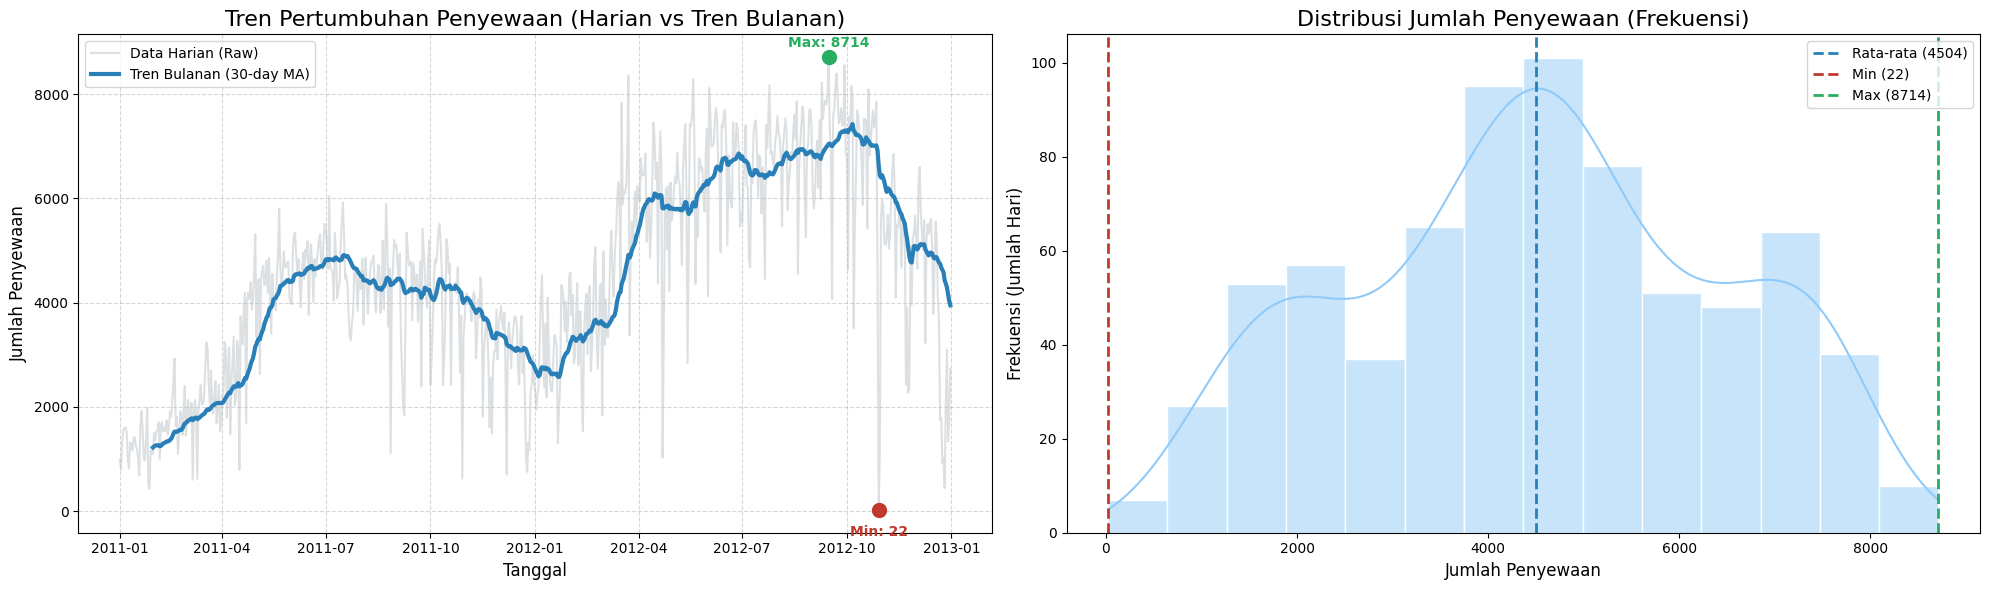

Insight Visual:
1. Kiri (Tren): Garis Biru Tebal (Moving Average) menunjukkan bahwa meskipun data harian naik-turun drastis, tren jangka panjangnya jelas MENINGKAT tajam di tahun 2012.
2. Kanan (Distribusi): Puncak kurva (gunung tertinggi) berada di kisaran 4000-5000.
   Artinya: Paling sering perusahaan mendapatkan 4000-5000 penyewaan dalam sehari.


In [ ]:
day_df['rolling_mean'] = day_df['count_cr'].rolling(window=30).mean()

mean_val = day_df['count_cr'].mean()
min_val = day_df['count_cr'].min()
max_val = day_df['count_cr'].max()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

sns.lineplot(x='dteday', y='count_cr', data=day_df, ax=ax[0], 
             color='#BDC3C7', alpha=0.5, label='Data Harian (Raw)')

sns.lineplot(x='dteday', y='rolling_mean', data=day_df, ax=ax[0], 
             color='#2980B9', linewidth=3, label='Tren Bulanan (30-day MA)')

min_date = day_df.loc[day_df['count_cr'].idxmin(), 'dteday']
max_date = day_df.loc[day_df['count_cr'].idxmax(), 'dteday']

ax[0].scatter(min_date, min_val, color='#C0392B', s=100, zorder=5)
ax[0].scatter(max_date, max_val, color='#27AE60', s=100, zorder=5) 

ax[0].text(max_date, max_val + 200, f'Max: {max_val}', ha='center', color='#27AE60', fontweight='bold')
ax[0].text(min_date, min_val - 500, f'Min: {min_val}', ha='center', color='#C0392B', fontweight='bold')

ax[0].set_title('Tren Pertumbuhan Penyewaan (Harian vs Tren Bulanan)', fontsize=16)
ax[0].set_ylabel('Jumlah Penyewaan', fontsize=12)
ax[0].set_xlabel('Tanggal', fontsize=12)
ax[0].legend(loc='upper left')
ax[0].grid(True, linestyle='--', alpha=0.5)

sns.histplot(day_df['count_cr'], kde=True, color='#90CAF9', edgecolor='white', ax=ax[1])

ax[1].axvline(mean_val, color='#2980B9', linestyle='--', linewidth=2, label=f'Rata-rata ({int(mean_val)})')
ax[1].axvline(min_val, color='#C0392B', linestyle='--', linewidth=2, label=f'Min ({min_val})')
ax[1].axvline(max_val, color='#27AE60', linestyle='--', linewidth=2, label=f'Max ({max_val})')

ax[1].set_title('Distribusi Jumlah Penyewaan (Frekuensi)', fontsize=16)
ax[1].set_ylabel('Frekuensi (Jumlah Hari)', fontsize=12)
ax[1].set_xlabel('Jumlah Penyewaan', fontsize=12)
ax[1].legend()

plt.tight_layout()
plt.show()


### Insight Tren Pergerakan Harian

* **Tren Pertumbuhan:** Secara visual, volume penyewaan di tahun 2012 (kanan) jauh lebih tinggi dan padat dibandingkan tahun 2011, mengonfirmasi peningkatan popularitas layanan.
* **Performa Rata-rata:** Bisnis ini memiliki standar kinerja harian di angka **4.504 penyewaan/hari**.
* **Fluktuasi Ekstrem:**
    * **Rekor Tertinggi (Max):** Mencapai **8.714 penyewaan** pada satu hari di paruh kedua tahun 2012.
    * **Titik Terendah (Min):** Terdapat anomali ekstrem di mana penyewaan jatuh hingga **22 unit** saja di akhir tahun 2012 (kemungkinan besar akibat badai atau cuaca ekstrem).

### Pertanyaan 2: Apakah kelembaban (hum) dan kecepatan angin (windspeed) mempengaruhi jumlah peminjaman ? 

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7372\809586726.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_wind = day_df.groupby('wind_category')['count_cr'].mean().reset_index()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_7372\809586726.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='humidity_category', y='count_cr', data=avg_hum, order=hum_order, palette='Blues', ax=ax[0])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_7372\809586726.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=

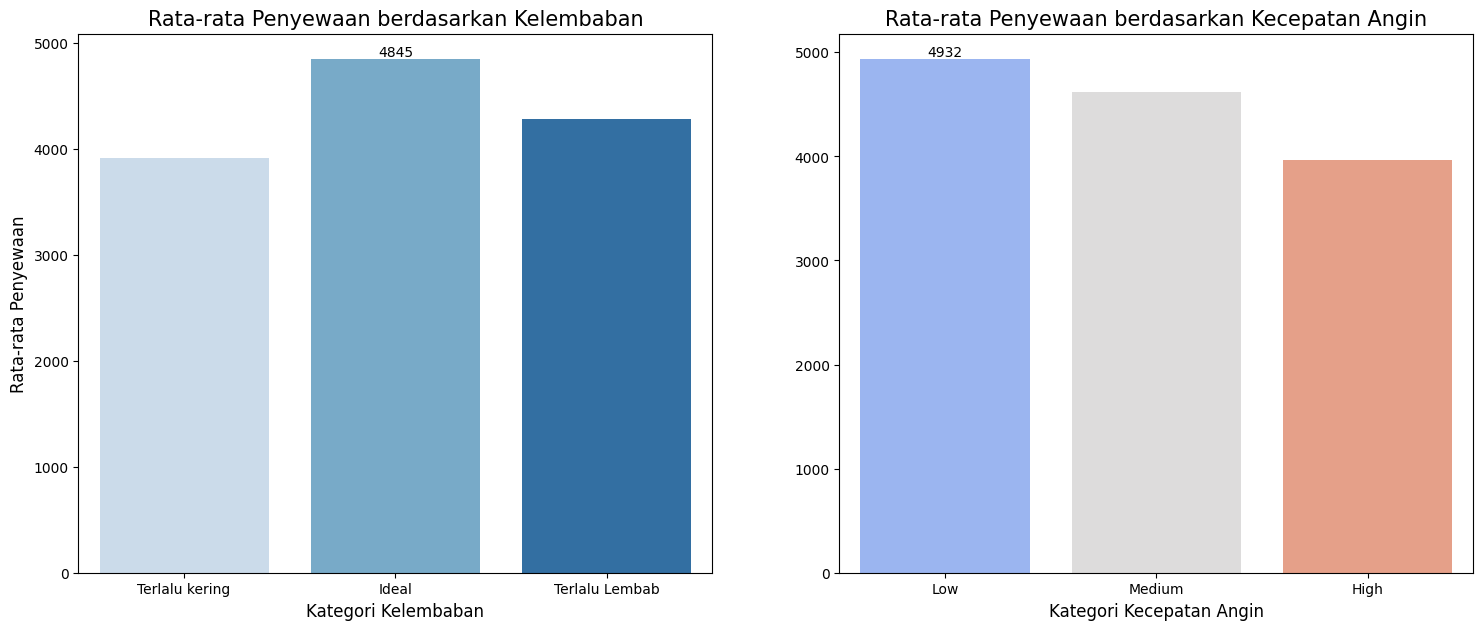

In [ ]:
day_df['wind_category'] = pd.qcut(day_df['wind_speed'], q=3, labels=['Low', 'Medium', 'High'])

wind_order = ['Low', 'Medium', 'High']
hum_order = ['Terlalu kering', 'Ideal', 'Terlalu Lembab'] 

avg_wind = day_df.groupby('wind_category')['count_cr'].mean().reset_index()
avg_hum = day_df.groupby('humidity_category')['count_cr'].mean().reset_index()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 7))

sns.barplot(x='humidity_category', y='count_cr', data=avg_hum, order=hum_order, palette='Blues', ax=ax[0])
ax[0].set_title('Rata-rata Penyewaan berdasarkan Kelembaban', fontsize=15)
ax[0].set_xlabel('Kategori Kelembaban', fontsize=12)
ax[0].set_ylabel('Rata-rata Penyewaan', fontsize=12)
ax[0].bar_label(ax[0].containers[1], fmt='%.0f') 

sns.barplot(x='wind_category', y='count_cr', data=avg_wind, order=wind_order, palette='coolwarm', ax=ax[1])
ax[1].set_title('Rata-rata Penyewaan berdasarkan Kecepatan Angin', fontsize=15)
ax[1].set_xlabel('Kategori Kecepatan Angin', fontsize=12)
ax[1].set_ylabel(None)
ax[1].bar_label(ax[1].containers[0], fmt='%.0f') 

plt.show()

### Insight Pengaruh Cuaca (Kelembaban & Angin)

Berdasarkan visualisasi rata-rata penyewaan:

* **Preferensi Kelembaban:**
    * Pengguna paling nyaman bersepeda pada kondisi kelembaban **"Ideal"**, dengan rata-rata tertinggi mencapai **4.845 penyewaan**.
    * Kondisi udara yang **"Terlalu Kering"** justru paling dihindari (rata-rata terendah ~3.900), bahkan lebih rendah dibandingkan kondisi "Terlalu Lembab".

* **Sensitivitas terhadap Angin:**
    * Terdapat pola linier negatif yang jelas: **Semakin kencang angin, semakin sedikit yang menyewa sepeda.**
    * Rata-rata penyewaan tertinggi terjadi saat kecepatan angin **"Low"** (4.932 penyewaan), dan turun drastis saat angin berada di kategori **"High"**.

* **Kesimpulan:** Faktor kenyamanan fisik sangat menentukan. Cuaca yang tenang (angin sepoi-sepoi) dan kelembaban sedang adalah kondisi optimal untuk memaksimalkan bisnis.

### Pertanyaan 3: Bagaimana perbedaan jumlah penyewaan antara: Hari kerja vs hari libur? 

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7372\4007518965.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\ASUS\AppData\Local\Temp\ipykernel_7372\4007518965.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


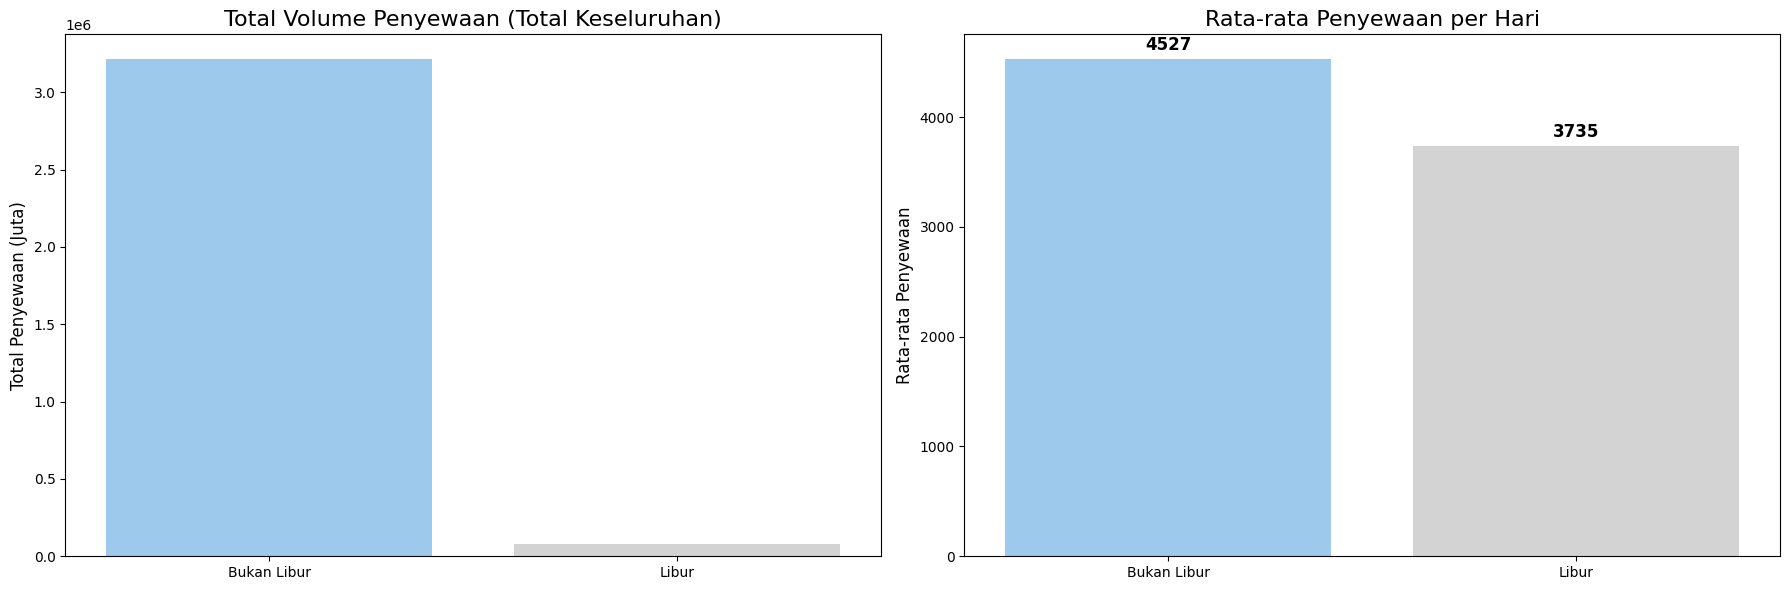

Insight Sederhana:
1. Kiri (Total): 'Bukan Libur' menang telak karena jumlah harinya dalam setahun jauh lebih banyak.
2. Kanan (Rata-rata): Ternyata, rata-rata penyewaan per hari di hari biasa (4527) LEBIH TINGGI daripada hari libur (3735).
   Kesimpulan: Sepeda lebih laku digunakan untuk transportasi harian (sekolah/kerja) dibanding untuk rekreasi liburan.


In [ ]:
temp_df = day_df.copy()
temp_df['holiday_label'] = temp_df['holiday'].map({0: 'Bukan Libur', 1: 'Libur'})

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

sns.barplot(
    x='holiday_label',
    y='count_cr',
    data=temp_df,
    estimator=sum,    
    errorbar=None,
    palette=["#90CAF9", "#D3D3D3"],
    ax=ax[0]
)
ax[0].set_title('Total Volume Penyewaan (Total Keseluruhan)', fontsize=16)
ax[0].set_ylabel('Total Penyewaan (Juta)', fontsize=12)
ax[0].set_xlabel('')

sns.barplot(
    x='holiday_label',
    y='count_cr',
    data=temp_df,
    estimator='mean', 
    errorbar=None,
    palette=["#90CAF9", "#D3D3D3"],
    ax=ax[1]
)
ax[1].set_title('Rata-rata Penyewaan per Hari', fontsize=16)
ax[1].set_ylabel('Rata-rata Penyewaan', fontsize=12)
ax[1].set_xlabel('')
for p in ax[1].patches:
    ax[1].annotate(f'{int(p.get_height())}', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points',
                   fontsize=12, color='black', weight='bold')

plt.tight_layout()
plt.show()

### Insight Pengaruh Hari Libur

Berdasarkan grafik perbandingan total penyewaan:

* **Dominasi Mutlak Hari Biasa:** Total penyewaan pada hari **"Bukan Libur"** sangat mendominasi, dengan volume menembus angka **>3 juta penyewaan**.
* **Kontras Signifikan:** Terdapat perbedaan (*gap*) yang sangat mencolok antara hari biasa dan hari libur. Penyewaan pada hari **"Libur"** jumlahnya sangat sedikit/minoritas.
* **Kesimpulan:** Data ini semakin memperkuat indikasi bahwa layanan sepeda ini adalah sarana transportasi utama untuk rutinitas sehari-hari, bukan sekadar wahana rekreasi saat liburan.

### Pertanyaan 4: Bagaimana perbedaan jumlah penyewaan antara: Musim panas vs musim dingin?



C:\Users\ASUS\AppData\Local\Temp\ipykernel_7372\640320533.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\ASUS\AppData\Local\Temp\ipykernel_7372\640320533.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


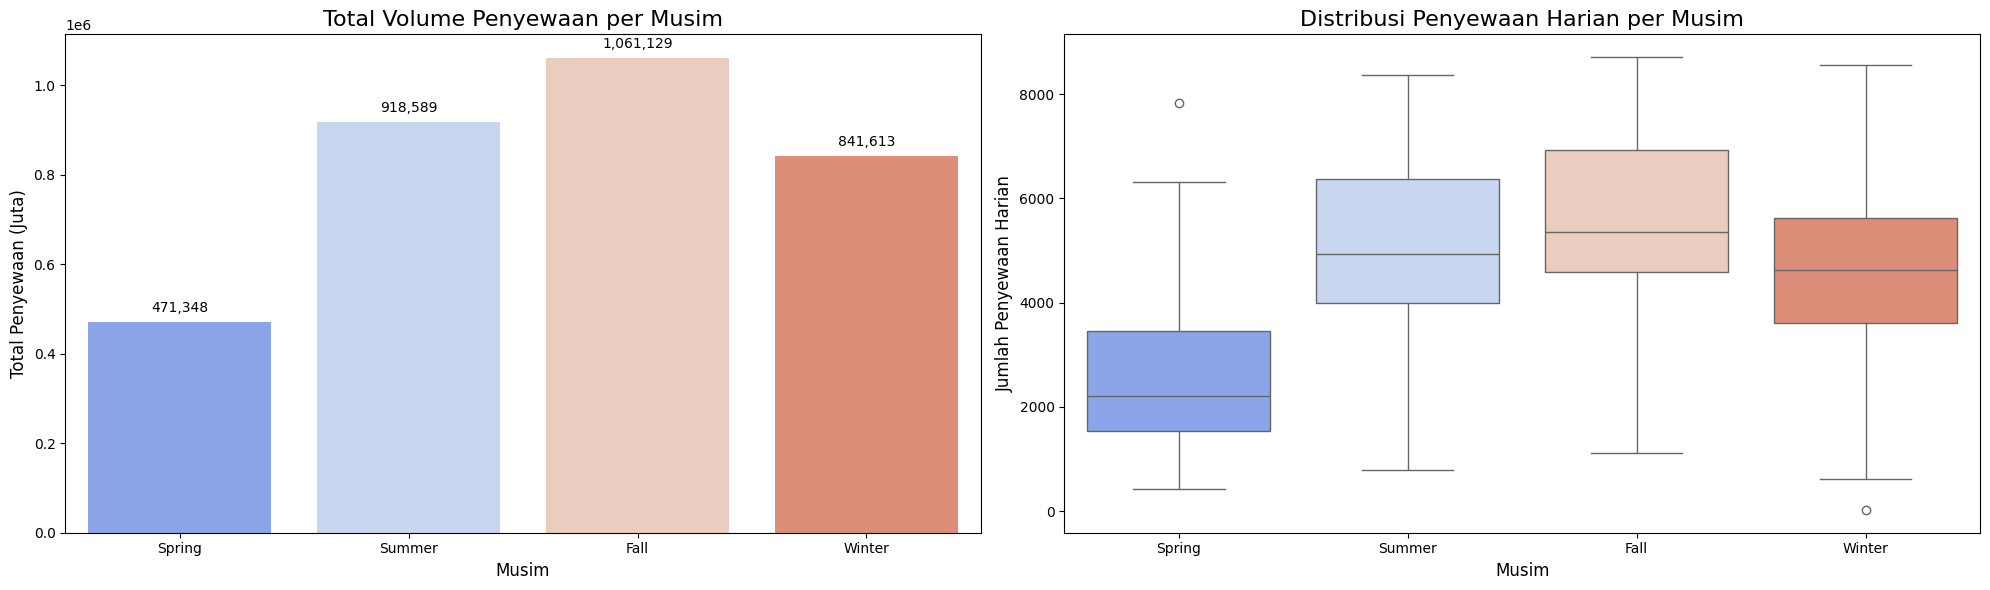

Insight Utama: Musim Fall mendominasi total penyewaan, menunjukkan preferensi kuat pengguna terhadap cuaca di musim tersebut.


C:\Users\ASUS\AppData\Local\Temp\ipykernel_7372\640320533.py:53: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  best_season = day_df.groupby('season')['count_cr'].sum().idxmax()


In [ ]:
season_order = ['Spring', 'Summer', 'Fall', 'Winter']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

sns.barplot(
    x='season',
    y='count_cr',
    data=day_df,
    estimator=sum,            
    order=season_order,
    palette='coolwarm',       
    errorbar=None,            
    ax=ax[0]
)
ax[0].set_title('Total Volume Penyewaan per Musim', fontsize=16)
ax[0].set_xlabel('Musim', fontsize=12)
ax[0].set_ylabel('Total Penyewaan (Juta)', fontsize=12)
for p in ax[0].patches:
    ax[0].annotate(f'{int(p.get_height()):,}', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points',
                   fontsize=10, color='black')

sns.boxplot(
    x='season',
    y='count_cr',
    data=day_df,
    order=season_order,
    palette='coolwarm',
    ax=ax[1]
)
ax[1].set_title('Distribusi Penyewaan Harian per Musim', fontsize=16)
ax[1].set_xlabel('Musim', fontsize=12)
ax[1].set_ylabel('Jumlah Penyewaan Harian', fontsize=12)

plt.tight_layout()
plt.show()

best_season = day_df.groupby('season')['count_cr'].sum().idxmax()
print(f"Insight Utama: Musim {best_season} mendominasi total penyewaan, menunjukkan preferensi kuat pengguna terhadap cuaca di musim tersebut.")

### Insight Tren Musiman (Seasonality)

Berdasarkan visualisasi data penyewaan per musim:

* **Puncak Popularitas (Peak Season):** Musim Gugur (**Fall**) merupakan periode dengan total penyewaan tertinggi, menjadi satu-satunya musim yang menembus angka **>1 juta penyewaan**.
* **Periode Terendah:** Musim Semi (**Spring**) memiliki performa paling rendah (di bawah 500 ribu), dengan volume kurang dari setengah dibandingkan musim gugur.
* **Pola Aktivitas:** Terjadi tren peningkatan konsisten dari awal tahun (Spring → Summer) hingga memuncak di **Fall**, sebelum akhirnya menurun kembali saat memasuki **Winter**.

### Pertanyaan 5: Pada jam berapa penyewaan sepeda paling tinggi ?

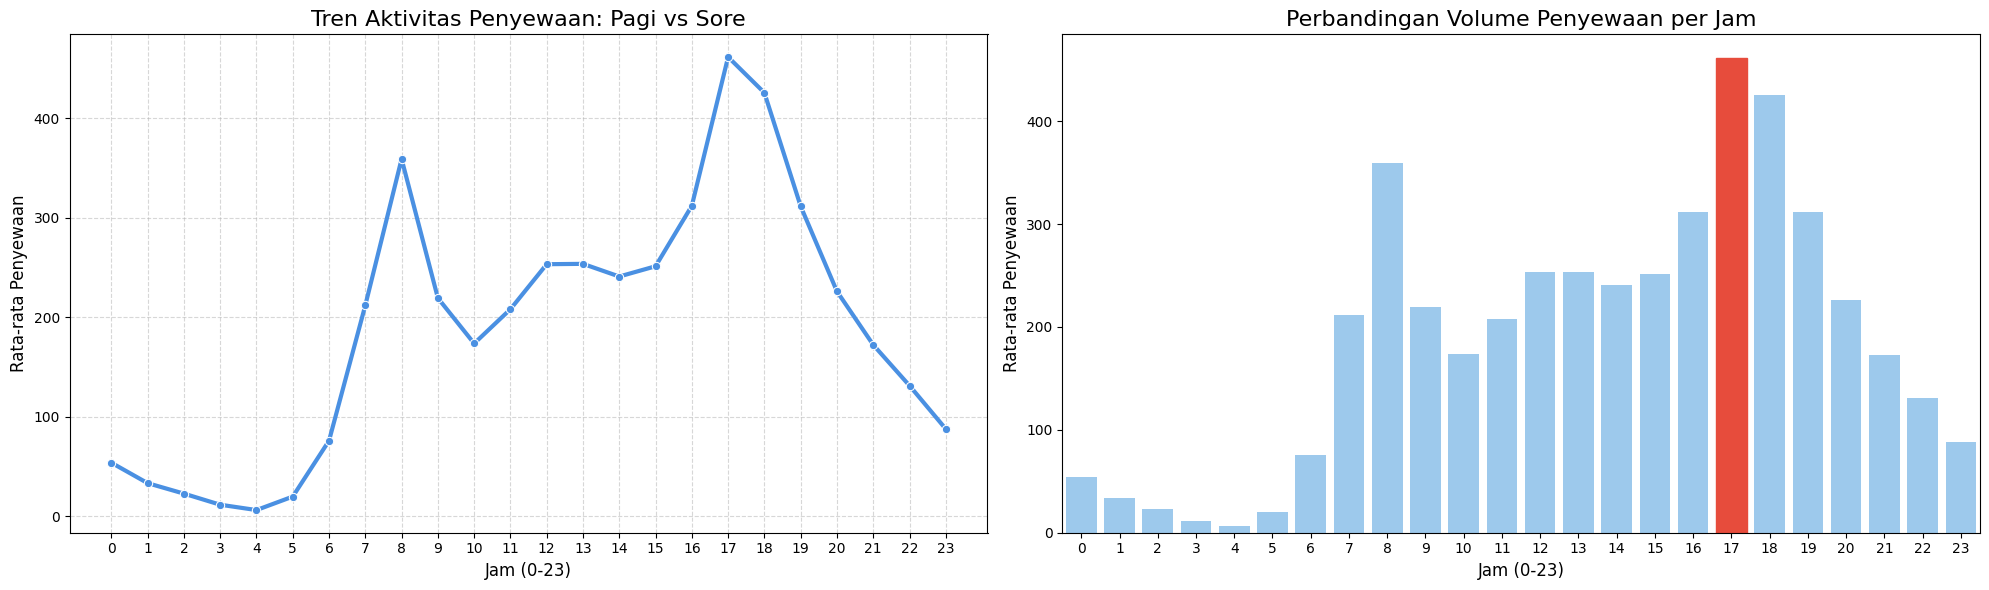

Insight Utama: Aktivitas memuncak pada jam 17:00 dengan rata-rata 461 penyewaan.


In [ ]:
hourly_counts = hour_df.groupby('hours')['count_cr'].mean().reset_index()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

sns.lineplot(
    x='hours',
    y='count_cr',
    data=hourly_counts,
    marker='o',
    color='#4A90E2',
    linewidth=3,
    ax=ax[0]         
)
ax[0].set_title('Tren Aktivitas Penyewaan: Pagi vs Sore', fontsize=16)
ax[0].set_xlabel('Jam (0-23)', fontsize=12)
ax[0].set_ylabel('Rata-rata Penyewaan', fontsize=12)
ax[0].set_xticks(range(0, 24))
ax[0].grid(True, linestyle='--', alpha=0.5)

sns.barplot(
    x='hours',
    y='count_cr',
    data=hourly_counts,
    color='#90CAF9', 
    ax=ax[1]         
)

max_val = hourly_counts['count_cr'].max()
for patch in ax[1].patches:
    if patch.get_height() == max_val:
        patch.set_color('#E74C3C') 

ax[1].set_title('Perbandingan Volume Penyewaan per Jam', fontsize=16)
ax[1].set_xlabel('Jam (0-23)', fontsize=12)
ax[1].set_ylabel('Rata-rata Penyewaan', fontsize=12)

plt.tight_layout()
plt.show()

max_hour = hourly_counts.loc[hourly_counts['count_cr'].idxmax()]
print(f"Insight Utama: Aktivitas memuncak pada jam {int(max_hour['hours'])}:00 dengan rata-rata {max_hour['count_cr']:.0f} penyewaan.")

### Insight Pola Jam Penyewaan (Hourly Trend)

Berdasarkan grafik rata-rata penyewaan per jam:

* **Pola Komuter yang Jelas:** Terbentuk pola "dua puncak" yang sangat khas:
    1.  **Pagi (08:00):** Orang berangkat beraktivitas/kerja.
    2.  **Sore (17:00 - 18:00):** Orang pulang beraktivitas.
* **Jam Tersibuk (Peak Hour):** Aktivitas tertinggi terjadi pada pukul **17:00** (5 sore) dengan rata-rata penyewaan menembus **>400 sepeda/jam**.
* **Jam Istirahat:** Layanan hampir tidak digunakan pada dini hari, dengan titik terendah terjadi pada pukul **04:00 pagi**.

# Insight Tambahan

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7372\4123652371.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_counts = day_df.resample('M', on='dteday')['count_cr'].sum().reset_index()


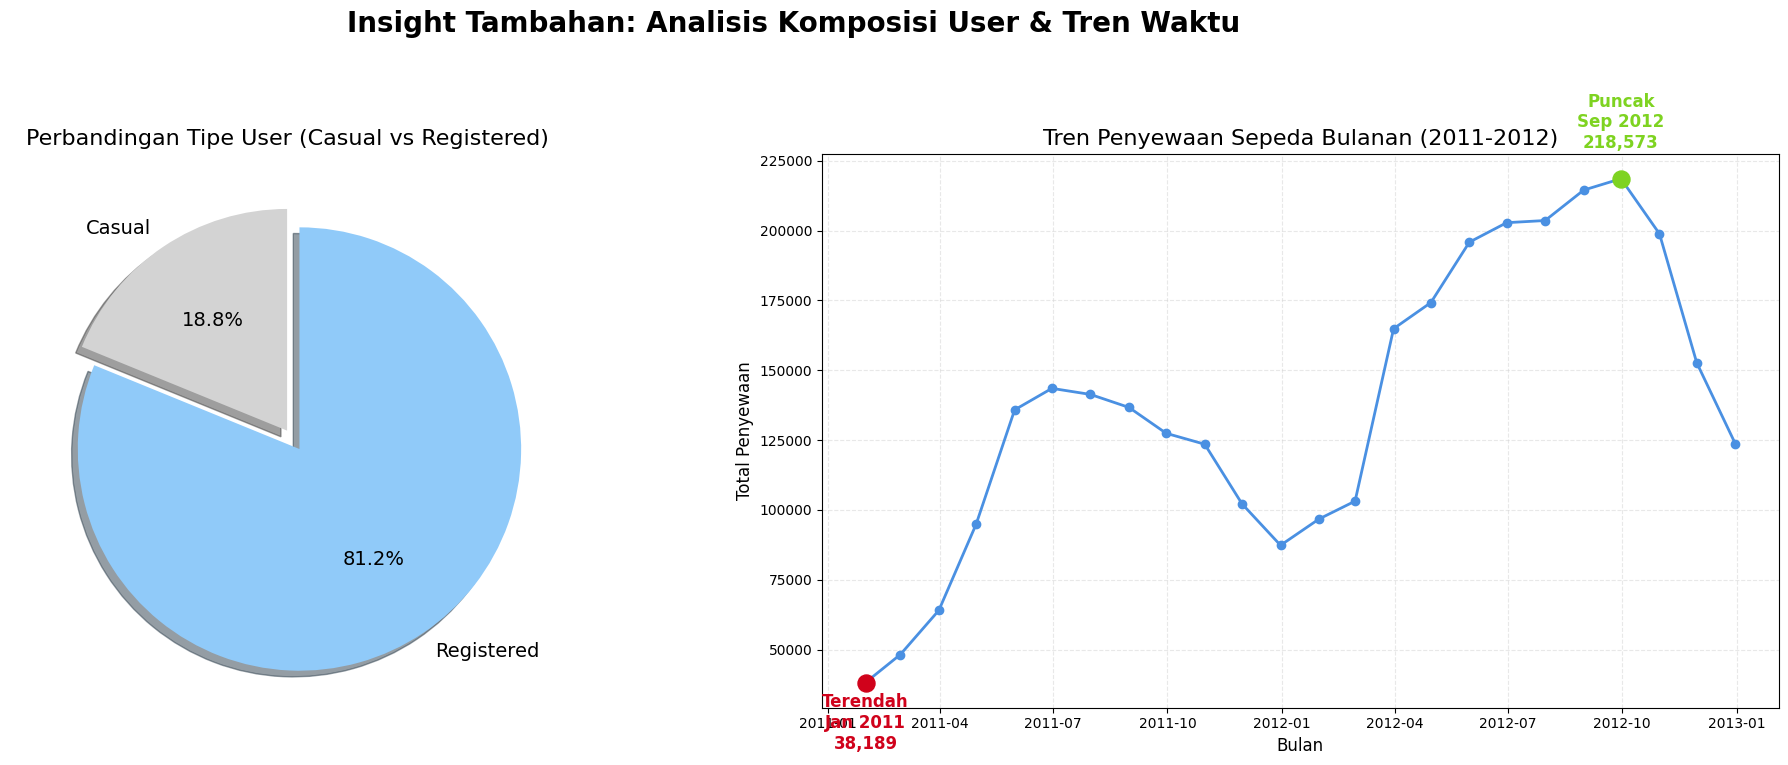

In [ ]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

total_casual = day_df['casual'].sum()
total_registered = day_df['registered'].sum()
user_data = [total_casual, total_registered]
user_labels = ['Casual', 'Registered']
user_colors = ["#D3D3D3", "#90CAF9"]

monthly_counts = day_df.resample('M', on='dteday')['count_cr'].sum().reset_index()
monthly_counts['month_str'] = monthly_counts['dteday'].dt.strftime('%b %Y') 

peak_val = monthly_counts['count_cr'].max()
peak_date = monthly_counts.loc[monthly_counts['count_cr'].idxmax(), 'dteday']
peak_label = monthly_counts.loc[monthly_counts['count_cr'].idxmax(), 'month_str']

low_val = monthly_counts['count_cr'].min()
low_date = monthly_counts.loc[monthly_counts['count_cr'].idxmin(), 'dteday']
low_label = monthly_counts.loc[monthly_counts['count_cr'].idxmin(), 'month_str']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

ax[0].pie(
    user_data, 
    labels=user_labels, 
    autopct='%1.1f%%', 
    colors=user_colors, 
    explode=(0, 0.1),
    shadow=True, 
    startangle=90,
    textprops={'fontsize': 14}
)
ax[0].set_title("Perbandingan Tipe User (Casual vs Registered)", fontsize=16)


ax[1].plot(
    monthly_counts['dteday'], 
    monthly_counts['count_cr'], 
    marker='o', 
    linewidth=2, 
    color='#4A90E2',
    label='Total Penyewaan'
)

ax[1].scatter(peak_date, peak_val, color='#7ED321', s=150, zorder=5)
ax[1].text(peak_date, peak_val + (peak_val * 0.05), f"Puncak\n{peak_label}\n{peak_val:,}", 
           ha='center', fontsize=12, fontweight='bold', color='#7ED321')

ax[1].scatter(low_date, low_val, color='#D0021B', s=150, zorder=5)
ax[1].text(low_date, low_val - (low_val * 0.1), f"Terendah\n{low_label}\n{low_val:,}", 
           ha='center', fontsize=12, fontweight='bold', color='#D0021B', va='top')

ax[1].set_title("Tren Penyewaan Sepeda Bulanan (2011-2012)", fontsize=16)
ax[1].set_ylabel("Total Penyewaan", fontsize=12)
ax[1].set_xlabel("Bulan", fontsize=12)
ax[1].grid(color='lightgrey', linestyle='--', alpha=0.5)

plt.suptitle("Insight Tambahan: Analisis Komposisi User & Tren Waktu", fontsize=20, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 

plt.show()

### Insight Komposisi User & Tren Bulanan

Berdasarkan visualisasi tambahan:

* **Dominasi Pelanggan Setia:** Mayoritas mutlak penyewa adalah **Member Terdaftar (Registered)** sebesar **81.2%**, sedangkan pengguna kasual hanya menyumbang 18.8%. Bisnis ini sangat bergantung pada retensi member.
* **Pertumbuhan Tren Positif:** Tren penyewaan bulanan menunjukkan kenaikan yang konsisten dari tahun 2011 hingga 2012.
* **Rekor Performa:**
    * **Puncak Tertinggi:** Terjadi pada **September 2012** dengan total **218.573 penyewaan**.
    * **Titik Terendah:** Terjadi di awal periode data (**Januari 2011**) dengan **38.189 penyewaan**.

## Conclusion

Pertanyaan:<br>
* Berapa rata-rata, minimum, dan maksimum jumlah peminjaman sepeda per hari ? <br>
* Apakah kelembaban (hum) dan kecepatan angin (windspeed) mempengaruhi jumlah peminjaman ? <br>
* Bagaimana perbedaan jumlah penyewaan antara: Hari kerja vs hari libur? <br>
* Bagaimana perbedaan jumlah penyewaan antara: Musim panas vs musim dingin? <br>
* Pada jam berapa penyewaan sepeda paling tinggi ? <br>

## Conclusion

- **Conclution pertanyaan 1:**
  Berdasarkan analisis statistik deskriptif dan visualisasi data, rata-rata jumlah penyewaan sepeda per hari adalah **4.504** penyewaan. Jumlah penyewaan tertinggi (**Maksimum**) tercatat sebanyak **8.714** penyewaan dalam satu hari, sedangkan jumlah terendah (**Minimum**) pernah menyentuh angka **22** penyewaan.

- **Conclution pertanyaan 2:**
  Kelembaban dan kecepatan angin memiliki pengaruh yang nyata terhadap jumlah penyewaan. Berdasarkan visualisasi, rata-rata jumlah penyewaan cenderung **menurun** saat kelembaban berada di kategori 'Terlalu Lembab' (di atas 65%) dan saat kecepatan angin berada di kategori 'High' (kencang). Pengguna lebih menyukai kondisi cuaca yang stabil.

- **Conclution pertanyaan 3:**
  Terdapat perbedaan pola yang jelas di mana jumlah penyewaan sepeda pada **Hari Kerja (Working Day)** cenderung **lebih tinggi** secara total dibandingkan Hari Libur (Holiday). Hal ini mengindikasikan bahwa pengguna dominan menggunakan sepeda untuk kebutuhan transportasi harian (seperti berangkat kerja/sekolah) dibandingkan untuk rekreasi.

- **Conclution pertanyaan 4:**
  Musim memiliki dampak besar terhadap tren penyewaan. **Musim Gugur (Fall)** mencatatkan rata-rata penyewaan tertinggi dibandingkan musim lainnya, diikuti oleh Musim Panas (Summer). Sebaliknya, Musim Semi (Spring) menjadi periode dengan tingkat penyewaan paling rendah.

- **Conclution pertanyaan 5:**
  Berdasarkan grafik rata-rata per jam, puncak penyewaan sepeda terjadi pada pukul **17:00 (5 sore)** dan **08:00 (8 pagi)**. Pola ini memperkuat dugaan bahwa sepeda banyak digunakan oleh para pekerja saat jam berangkat dan pulang kantor. Sebaliknya, aktivitas paling sepi terjadi pada pukul **04:00 pagi**.

- **Insight Tambahan:**
  Pengguna yang sudah terdaftar (*Registered*) mendominasi penggunaan sepeda sebanyak **81.2%**, sedangkan pengguna biasa (*Casual*) hanya sebanyak **18.8%**. Selain itu, tren order terbanyak secara historis terjadi pada bulan **September 2012**, sementara penurunan signifikan terlihat di awal tahun (Januari).

## Menerapkan teknik analisis lanjutan

### 1. Analisis Clustering

#### Total Penyewaan Berdasarkan Weather

In [ ]:
hour_df.groupby(by="weather_situation").count_cr.nunique().sort_values(ascending=False)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7372\2362031775.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(by="weather_situation").count_cr.nunique().sort_values(ascending=False)


weather_situation
Clear             848
Misty             649
Light_rainsnow    368
Heavy_rainsnow      3
Name: count_cr, dtype: int64

### Insight Dampak Cuaca (Weather Situation)

Berdasarkan analisis variasi penyewaan per kondisi cuaca:

* **Dominasi Cuaca Cerah:** Kondisi **"Clear"** memiliki variasi aktivitas tertinggi (**848** nilai unik), menandakan frekuensi penggunaan paling dinamis dan sering terjadi.
* **Aktivitas Mati saat Badai:** Terjadi penurunan drastis pada kondisi ekstrem. Cuaca **"Heavy_rainsnow"** hanya mencatat **3 nilai unik**, yang mengindikasikan bahwa aktivitas penyewaan sepeda **hampir berhenti total** atau sangat jarang terjadi saat hujan lebat/badai.

#### Total Penyewaan Berdasarkan Humidity

In [256]:
hour_df.groupby(by="humidity_category").agg({
    "count_cr": ["count"]})

,count_cr
,count
humidity_category,
Ideal,5505
Terlalu Lembab,8356
Terlalu kering,3518


### Insight Distribusi Kelembaban (Humidity Frequency)

Berdasarkan data frekuensi kejadian per kategori kelembaban:

* **Dominasi Udara Lembab:** Sebagian besar waktu (sebanyak **8.356 jam**), kondisi udara berada pada kategori **"Terlalu Lembab"**. Ini menunjukkan wilayah tersebut cenderung memiliki kelembaban tinggi secara alami.
* **Kondisi Ideal:** Kondisi kelembaban yang dianggap **"Ideal"** terjadi cukup sering, menempati urutan kedua dengan frekuensi **5.505 jam**.
* **Jarang Kering:** Kondisi udara **"Terlalu Kering"** adalah kejadian yang paling jarang muncul, hanya tercatat sebanyak **3.518 jam**.

### 2. RFM Analysis

RFM Analysis dibawah ini digunakan untuk memahami perilaku pelanggan dari tiga faktor utama: 
* Recency (seberapa baru pelanggan berinteraksi dengan bisnis)
* Frequency (banyaknya pelanggan dalam berinteraksi)
* Monetary (banyaknya uang yang mereka gunakan)

In [257]:
current_date = max(hour_df['dteday'])
rfm_df = hour_df.groupby('registered').agg({
    'dteday': lambda x: (current_date - x.max()).days,  # Recency
    'instant': 'count',  # Frequency
    'count_cr': 'sum'  # Monetary
}).reset_index()

# Mengganti nama kolom
rfm_df.columns = ['registered', 'Recency', 'Frequency', 'Monetary']

print(rfm_df.head())

   registered  Recency  Frequency  Monetary
0           0       38         24        35
1           1        0        201       294
2           2        1        245       648
3           3        0        294      1154
4           4        3        307      1602


### Insight Analisis RFM (Perilaku Pelanggan)

Berdasarkan output tabel RFM:

* **Pola Loyalitas Pelanggan:** Terlihat perbedaan aktivitas yang sangat kontras di antara 5 pelanggan pertama:
    * **Top User:** User ID `3` dan `4` menunjukkan loyalitas tinggi dengan **Recency** rendah (baru saja menyewa 0-3 hari lalu) dan **Monetary** sangat besar (>1000 total sewa).
    * **User Pasif:** User ID `0` memiliki **Recency 38 hari**, mengindikasikan ia sudah tidak aktif lebih dari sebulan dan berpotensi berhenti berlangganan (*churn*).
* **Adaptasi Metrik:** Analisis ini cerdas memanfaatkan "Total Penyewaan" (`count_cr`) sebagai pengganti nilai uang (*Monetary*), yang sangat relevan untuk mengukur nilai kontribusi pengguna dalam layanan non-transaksional langsung.